In [ ]:
import numpy as np
import os, glob, csv


import librosa

import sklearn

import torch
import torch.nn as nn
import torch.nn.functional as nnF
from torchsummary import summary

%matplotlib inline
import matplotlib.pyplot as plt

import math


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# use GPU if available, otherwise, use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def extract_melspectrogram(filename, win_len=0.05, hop_len=0.025, n_mels=64):
    audio, sr = librosa.load("{}".format(filename), sr=22050)
    win_len = int(win_len*sr)
    hop_len = int(hop_len*sr)
    spec = librosa.feature.melspectrogram(audio, sr, n_mels=n_mels, n_fft=2048, win_length=win_len, hop_length=hop_len)
    return spec.transpose((1,0))

#plt.imshow(librosa.power_to_db(x, ref=np.max), aspect='auto', origin='lower')

In [ ]:
!unzip '/content/drive/MyDrive/Deep_learning_music_project/trigger_word_dataset.zip'

In [ ]:
pos_base_dir = "/content/trigger_word_dataset/positives/"
neg_base_dir = "/content/trigger_word_dataset/negatives/"

In [ ]:
pos_dir = os.listdir(pos_base_dir)
neg_dir = os.listdir(neg_base_dir)

In [ ]:
print(len(neg_dir))
print(len(pos_dir))
data_set_size = len(neg_dir) + len(pos_dir)

2272
2367


In [ ]:
x = extract_melspectrogram(pos_base_dir+pos_dir[0])
print(x.shape)

(41, 64)


In [ ]:
pos_data = [] # for storing mel spectrograms

In [ ]:
counter = 0
for i,pos in enumerate(pos_dir):
  x = extract_melspectrogram(pos_base_dir+pos)
  if x.shape != (41,64):
    print("skipped!")
    counter+=1
    continue
  pos_data.append(x)
print(counter)


skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
s

In [ ]:
pos_data = np.array(pos_data)
pos_data.shape

(2105, 41, 64)

In [ ]:
counter=0
neg_data = []
for i,neg in enumerate(neg_dir):
  i+=len(pos_dir)
  x = extract_melspectrogram(neg_base_dir+neg)
  if x.shape != (41,64):
    print("skipped!")
    counter+=1
    continue
  neg_data.append(x)

print(counter)

skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
skipped!
s

In [ ]:
neg_data = np.array(neg_data)
neg_data.shape

(2061, 41, 64)

In [ ]:
all_labels = np.append(np.ones(pos_data.shape[0]),np.zeros(neg_data.shape[0]) )
print(all_labels.shape)
print(sum(all_labels))

(4166,)
2105.0


In [ ]:
all_data = np.append(pos_data,neg_data,axis=0)
all_data.shape

(4166, 41, 64)

In [ ]:
# save data 
np.save("trigger_simple_dataset_x.npy",all_data)
np.save("trigger_simple_dataset_y.npy",all_labels)

In [ ]:
!unzip '/content/drive/MyDrive/Deep_learning_music_project/trigger_simple_approach.zip'

Archive:  /content/drive/MyDrive/Deep_learning_music_project/trigger_simple_approach.zip
   creating: trigger_simple_approach/
  inflating: trigger_simple_approach/trigger_simple_dataset_x.npy  
  inflating: trigger_simple_approach/trigger_simple_dataset_y.npy  


In [ ]:
x_train = np.load("/content/trigger_simple_approach/trigger_simple_dataset_x.npy")
y_train = np.load("/content/trigger_simple_approach/trigger_simple_dataset_y.npy")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30)

In [ ]:
x_valid,x_test,y_valid,y_test = train_test_split(x_test, y_test, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)


(2916, 41, 64)
(1000, 41, 64)
(250, 41, 64)


In [ ]:
print(sum(y_train))
print(sum(y_valid))
print(sum(y_test))

1488.0
505.0
112.0


In [ ]:
np.save("/content/data/train/x.npy",x_train)
np.save("/content/data/train/y.npy",y_train)
np.save("/content/data/valid/x.npy",x_valid)
np.save("/content/data/valid/y.npy",y_valid)
np.save("/content/data/test/x.npy",x_test)
np.save("/content/data/test/y.npy",y_test)

In [ ]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/train/ (stored 0%)
  adding: content/data/train/x.npy (deflated 5%)
  adding: content/data/train/y.npy (deflated 96%)
  adding: content/data/test/ (stored 0%)
  adding: content/data/test/x.npy (deflated 5%)
  adding: content/data/test/y.npy (deflated 91%)
  adding: content/data/valid/ (stored 0%)
  adding: content/data/valid/x.npy (deflated 5%)
  adding: content/data/valid/y.npy (deflated 95%)
  adding: content/data/.ipynb_checkpoints/ (stored 0%)


In [ ]:
!unzip '/content/drive/MyDrive/Deep_learning_music_project/train_test_val_data.zip'

Archive:  /content/drive/MyDrive/Deep_learning_music_project/train_test_val_data.zip
   creating: train_test_val_data/
   creating: train_test_val_data/.ipynb_checkpoints/
   creating: train_test_val_data/test/
  inflating: train_test_val_data/test/x.npy  
  inflating: train_test_val_data/test/y.npy  
   creating: train_test_val_data/train/
  inflating: train_test_val_data/train/x.npy  
  inflating: train_test_val_data/train/y.npy  
   creating: train_test_val_data/valid/
  inflating: train_test_val_data/valid/x.npy  
  inflating: train_test_val_data/valid/y.npy  


In [ ]:
x_train = np.load("/content/train_test_val_data/train/x.npy")
y_train = np.load("/content/train_test_val_data/train/y.npy")
x_valid = np.load("/content/train_test_val_data/valid/x.npy")
y_valid = np.load("/content/train_test_val_data/valid/y.npy")
x_test = np.load("/content/train_test_val_data/test/x.npy")
y_test = np.load("/content/train_test_val_data/test/y.npy")

In [ ]:
# data normalisation
scaler = StandardScaler()
# compute normalisation parameters based on the training data 
# QUESTION: why do we reshape the data to (-1,64)?
scaler.fit(x_train.reshape((-1,64)))
# print(scaler.mean_)

# normalise the training data with the computed parameters
x_train = scaler.transform(x_train.reshape((-1,64)))
x_train = x_train.reshape((-1, 41, 64)) # reverse back to the original shape
#print(train_data[0])

# normalise the validation data with the computed parameters
x_valid = scaler.transform(x_valid.reshape((-1,64)))
x_valid = x_valid.reshape((-1, 41, 64)) # reverse back to the original shape
#print(valid_data[0])

# normalise the test data with the computed parameters
x_test = scaler.transform(x_test.reshape((-1,64)))
x_test = x_test.reshape((-1, 41, 64)) # reverse back to the original shape
#print(test_data[0])

In [ ]:
class DetectionModel(nn.Module):
    """The CNN model"""
    def __init__(self):
        
        super(DetectionModel, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64,
                               kernel_size=(5, 5), bias=False,padding="same")

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128,
                               kernel_size=(3, 3), bias=False,padding="same")

        self.conv3 = nn.Conv2d(in_channels=128, out_channels=128,
                               kernel_size=(3, 3), bias=False)

        self.fc1 = nn.Linear(128, 128, bias=True)
        self.fc2 = nn.Linear(128, 1, bias=True)

        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(128)


    def forward(self, x):
        (_, time_len, mel_bins) = x.shape

        x = x.view(-1, 1, time_len, mel_bins)
        # print('Input')
        # print(x.size())

        x = nnF.relu(self.bn1(self.conv1(x)))
        # print('Conv1')
        # print(x.size())
        x = nnF.max_pool2d(x,kernel_size=(2,4),padding=(0,2))
        # print('Pool1')
        # print(x.size())
        
        x = nnF.relu(self.bn2(self.conv2(x)))
        # print('Conv2')
        # print(x.size())
        x = nnF.max_pool2d(x,kernel_size=(3,3),padding=(1,1))
        # print('Pool2')
        # print(x.size())
        
        x = nnF.relu(self.bn3(self.conv3(x)))
        # print('Conv3')
        # print(x.size())
        x = nnF.max_pool2d(x,kernel_size=(5,4))
        # print('Pool3')
        # print(x.size())
        
        # flatten
        x = x.view(-1, self.num_flat_features(x))
        x = nnF.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))

        return x

    def forward_and_convert(self, x):
        "Handles the torch<--->numpy tensor conversion, for convenience"
        x_torch = torch.FloatTensor(x)
        y_torch = self.forward(x_torch)
        return y_torch.detach().numpy()
        
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
# create a model instance
net = DetectionModel()
print(net)

# Binary-cross entropy loss, closely related to logistic regression loss
criterion = nn.BCELoss()

# Adam Optimizer, learning rate 0.001
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.)

DetectionModel(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=same, bias=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
summary(net, (41, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 41, 64]           1,600
       BatchNorm2d-2           [-1, 64, 41, 64]             128
            Conv2d-3          [-1, 128, 20, 17]          73,728
       BatchNorm2d-4          [-1, 128, 20, 17]             256
            Conv2d-5            [-1, 128, 5, 4]         147,456
       BatchNorm2d-6            [-1, 128, 5, 4]             256
            Linear-7                  [-1, 128]          16,512
            Linear-8                    [-1, 1]             129
Total params: 240,065
Trainable params: 240,065
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.27
Params size (MB): 0.92
Estimated Total Size (MB): 4.19
----------------------------------------------------------------


In [ ]:
input = torch.randn(1,41,64)
net(input)

tensor([[0.3979]], grad_fn=<SigmoidBackward0>)

In [ ]:
# minibatch size (remember stochastic gradient descent?)
batch_size = 4

# some helpful functions

'''
Evaluate a network "model" on the data "data" 
Predicted class labels will be returned
'''
def evaluate(model, data):
    pred = np.zeros(len(data)) # for storing predicted class labels, one for each data sample
    num_batch = len(data)//batch_size # number of batches in one data epoch
    # evaluate batch by batch and store the output to "pred"
    for i in range(num_batch):
        temp = model.forward_and_convert(data[i*num_batch : (i+1)*num_batch])
        # QUESTION: what does squeeze() function do?
        pred[i*num_batch : (i+1)*num_batch] = temp.squeeze()
    # some trailing data samples
    if(num_batch*batch_size < len(data)):
        temp = model.forward_and_convert(data[num_batch*batch_size :])
        pred[num_batch*batch_size :] = temp.squeeze()
    # each element in "pred" is the output after sigmoid function and has value in [0, 1].
    # to obtain the discrete label (0 or 1 in this case), we threshold the value by 0.5.
    pred[pred >= 0.5] = 1.
    pred[pred < 0.5] = 0.
    return pred

'''
Randomly shuffle the data. It will be used to shuffle the training data after every training epoch
'''
def shuffle_data(data, label):
    # permute the data indices
    rand_ind = np.random.permutation(len(data))
    # re-order the data with the pumuted indices
    return data[rand_ind], label[rand_ind]

In [ ]:
'''The training loop'''
training_loss_history = []
val_acc_history = []
num_epochs = 100 # the number of training epoch (i.e. when you've gone through all samples of the training data, that's one epoch)
evaluate_every_epoch = 1 # how often you want to evaluate the network during training?
best_valid_acc = 0.0 # for keeping track of the best accuracy on the validation data
saved_model = './best_model' # path for saving the best model during training

for epoch in range(num_epochs):
    # shuffle training data
    train_data, train_label = shuffle_data(x_train, y_train)
    
    # the number of minibatch in one epoch
    num_batch = len(train_data) // batch_size
    for i in range(num_batch):
        # sample one minibatch
        batch_data = train_data[i*batch_size : (i+1)*batch_size]
        label_data = train_label[i*batch_size : (i+1)*batch_size]
    
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.FloatTensor(batch_data))
        loss = criterion(outputs.squeeze(), torch.FloatTensor(label_data))
    
        loss.backward()
        optimizer.step()

    running_loss = loss.item()
    # print training loss
    print('[%d] loss: %.8f' %(epoch, running_loss))
    training_loss_history.append(running_loss)
    # evaluate the network on the validation data
    if((epoch+1) % evaluate_every_epoch == 0):
        valid_pred = evaluate(net, x_valid)
        valid_acc = accuracy_score(valid_pred, y_valid)
        print('Validation accuracy: %g' % valid_acc)
        val_acc_history.append(valid_acc)
        # if the best validation performance so far, save the network to file 
        if(best_valid_acc < valid_acc):
            best_valid_acc = valid_acc
            print('Saving best model')
            torch.save(net.state_dict(), saved_model)

[0] loss: 0.54096967
Validation accuracy: 0.709
Saving best model
[1] loss: 0.44150168
Validation accuracy: 0.711
Saving best model
[2] loss: 0.36388269
Validation accuracy: 0.743
Saving best model
[3] loss: 0.07905370
Validation accuracy: 0.789
Saving best model
[4] loss: 0.18227805
Validation accuracy: 0.827
Saving best model
[5] loss: 0.04182323
Validation accuracy: 0.872
Saving best model
[6] loss: 0.01414152
Validation accuracy: 0.799
[7] loss: 2.42124510
Validation accuracy: 0.826
[8] loss: 0.16020587
Validation accuracy: 0.848
[9] loss: 0.44830632
Validation accuracy: 0.873
Saving best model
[10] loss: 0.02802875
Validation accuracy: 0.865
[11] loss: 0.01107284
Validation accuracy: 0.894
Saving best model
[12] loss: 0.03225677
Validation accuracy: 0.897
Saving best model
[13] loss: 0.10872759
Validation accuracy: 0.857
[14] loss: 0.06864517
Validation accuracy: 0.865
[15] loss: 0.00793055
Validation accuracy: 0.875
[16] loss: 0.22100148
Validation accuracy: 0.91
Saving best mode

Text(0.5, 1.0, 'validation accuracy')

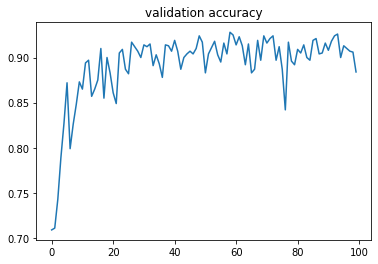

In [ ]:
plt.plot(val_acc_history)
plt.title("validation accuracy")

Text(0.5, 1.0, 'training loss')

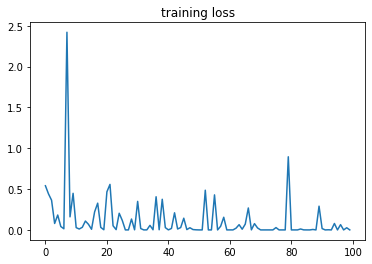

In [ ]:
plt.plot(training_loss_history)
plt.title("training loss")

In [ ]:
net.load_state_dict(torch.load("./best_model"))

<All keys matched successfully>

In [ ]:
# evaluate on test data 
test_preds = evaluate(net,x_test)
test_acc = accuracy_score(test_preds, y_test)
print(test_acc)

0.916
